# Introduction

The purpose of this Project is to analyze data about diverse species observed in various national park areas. The data used for this project was obtained from the national park service and is *inspired* by genuine data but is primarily fictitious. 

This project will scope, analyse, prepare, plot data, and attempt to explain the conclusions of the analysis.

The project objective can be broken down into the following questions:

- What is the distribution of conservation status for species?
- Are particular sorts of species more likely to become endangered?
- Are differences in species conservation status relatively significant?
- Which animals are most common, and how are they distributed among parks?

**Data sources:**

'Observations.csv' and 'Species info.csv' - [Codecademy.com](https://www.codecademy.com).


# Scope

This project aims to help the national park services to prevent loss of biodiversity from various national parks. The loss of biodiversity impacts the whole eco system of the park as a whole since all life forms within the park depend on each other either directly or indirectly.

 The first section defines the project goals; this section will outline the high-level objectives and set the project's aims. The second section is the data; which is already provided in this project, but it still needs to be cleaned and tuned to meet the project goals. The third section includes the analysis, which includes the methodologies and questions that are linked with the project objectives. Finally, the evaluation will aid us in drawing conclusions to explain our findings from our analysis.

#### 1. Project Goals

The perspective of the this project will be through a biodiversity analyst for the National Parks Service. As analysts, we want to identify any at-risk and endangered species to ensure their survival, in order to maintain a high level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species, their conservations status, and their relationship to the rest of the national park's ecosystem. The project goals can be framed into the following questions:

- What is the distribution of conservation status for species?
- Identify types of species which are more likely to be endangered if any?
- Are the differences between species and their conservation status significant?
- Which animal species is the most common and what is their distribution amongst different national parks?

#### 2. Data

The first `csv` file has information about each species and the other has observations of species with respective park locations. 

#### 3. Analysis

To perform data analysis, descriptive statistics and data visualization techniques will be employed to understand the data. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

#### 4. Evaluation

Lastly, in this section we will revisit the goals and check if the output of the analysis can explain the questions we first set to answer. This section will also reflect on what has been learned through the process, and if any of the questions were left un-answered. This could also include limitations or if any of the analysis could have been done using different techniques.


# PROJECT CODE

### Step 1. Importing modules
We import the following modules to achieve the respective goals;

- PANDAS - We import pandas to create a csv reader object that can be used to extract the raw data from the provided data files.

 

In [1]:
import pandas as pd



### Step 2. Loading the Data
The given CSV data files include:

species_info.csv - contains data about different species and their conservation status
observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
The datasets provided have the following columns of data:

species_info.csv:

- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status

observations.csv:

- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [2]:
species_data = pd.read_csv('species_info.csv')  # We utilise dataframe data structure to store extracted data
species_data.head()  # To peek the the extracted data

observation_data = pd.read_csv('observations.csv')
observation_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species_shape = species_data.shape  # To check the dimensions of the species data matrix
print('Species data dimensions are:', species_shape)
observation_shape = observation_data.shape  # To check the dimensions of the observed data matrix
print('Observed data dimensions are:', observation_shape)

Species data dimensions are: (5824, 4)
Observed data dimensions are: (23296, 3)


### Step 3. Exploring the Data
To calculate summary statistics for our data sets;
- We first need to extract the total number of species we are dealing with
- Next we need to know the distinct categories of species we have
- Then we can obtain the counts of species in each of the categories
- And finally we can obtain the number of conservation status categories and their counts respectively 

#### 3.1 Species count
To obtain this count, we can simply look for all the unique species names in the scientific_name column in the species_info.csv data file and count them up.

In [4]:
species_count = species_data.scientific_name.nunique()
print("The total number of unique species is: ", species_count)

The total number of unique species is:  5541


#### 3.2 Species categories count
To obtain this count, we can simply look for all the unique species category names in the category column in the species_info.csv data file and count them up.

In [5]:
species_categories_count = species_data.category.nunique()
print("The total number of unique species categories is: ", species_categories_count)

The total number of unique species categories is:  7


#### 3.3 Species count for each unique category
To obtain this count, we can simply group the data set by category and obtain the size of each data set.

In [6]:
grouped_categories = species_data.groupby("category").size()
print(grouped_categories)

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


#### 3.4 Conservation status category count & list
To obtain this count, we can simply look for all the unique conservation category names in the conservation_status column in the species_info.csv data file and count them up.

In [20]:
conservation_category_count = species_data.conservation_status.nunique()
conservation_categories = species_data.conservation_status.unique()

print("The total number of unique conservation category names is: ", conservation_category_count)
print("The unique conservation category names are: ")
for name in conservation_categories:
    print('\t- ' + str(name))

The total number of unique conservation category names is:  4
The unique conservation category names are: 
	- nan
	- Species of Concern
	- Endangered
	- Threatened
	- In Recovery


#### 3.5 Species count for each unique conservation status category
To obtain this count, we can simply group the data set by category and obtain the size of each data set.
- Note that here the 'nan' category just refers to the species that do not face any kind of endengerment

In [11]:
grouped_conservation_categories = species_data.groupby("conservation_status").size()
nan_category = species_data.conservation_status.isna().sum()
print(grouped_conservation_categories)
print("Nan : ", nan_category)

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Nan :  5633


#### 3.6 Observations
Next we explore at our observations data. Firstly we want to know how many parks our data was collected from along with their names. We would also like to further determine the total amount of observations that were recorded within the 7 day study period.

In [17]:
number_parks = observation_data.park_name.nunique()
park_names = observation_data.park_name.unique()
total_observations = observation_data.observations.sum()

print("The total number of unique parks is: ", number_parks)
print("The unique park names are: ")
for park in park_names:
    print('\t- ' + park)
print("The total number of observations recorded is: ", total_observations)

The total number of unique parks is:  4
The unique park names are: 
	- Great Smoky Mountains National Park
	- Yosemite National Park
	- Bryce National Park
	- Yellowstone National Park
The total number of observations recorded is:  3314739


### Step 4. Analysis
In this section we will focus on analysing the data we explored in the above section. In order to do this, we first need to clean and tune our data. We can start with the conservation status column where we saw a lot of `Nan values` which we will now change to `No Intervention`. These are the categories of the conservation status:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In [21]:
species_data.fillna('No Intervention', inplace=True)
species_data.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next, we examine the many categories contained in the 'conservation status' column, except for those that do not need action. Here are the table and chart to investigate.

In [22]:
conservation_category = species_data[species_data.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


There were seven animals and four birds among those listed as 'Endangered'. There were three birds and one mammal in the 'In Recovery' category, which might indicate that the birds are recovering faster than the mammals.

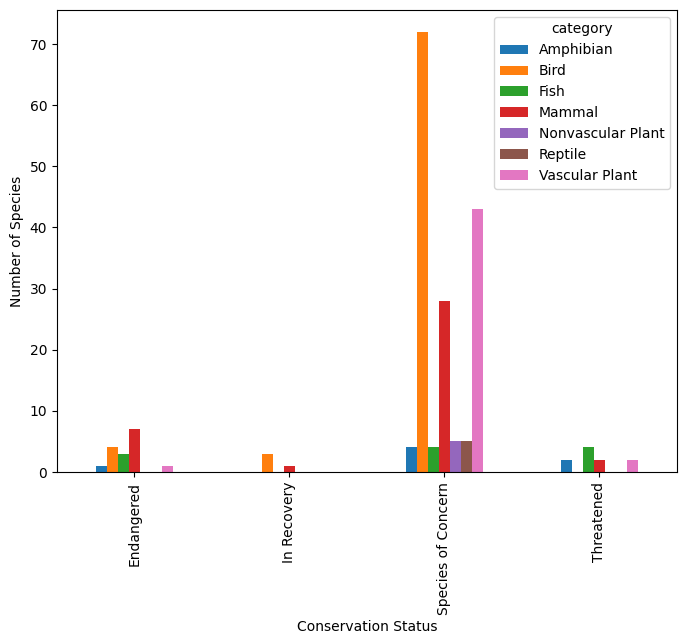

In [23]:
analysis_plot = conservation_category.plot(kind = 'bar', figsize=(8,6), 
                               stacked=False)
analysis_plot.set_xlabel("Conservation Status")
analysis_plot.set_ylabel("Number of Species");

#### 4.1 Species in conservation

The next question is whether particular species are more prone to become endangered. This may be addressed by adding a new column named 'is protected' and include any species with a value other than 'No Intervention'.

In [24]:
species_data['is_protected'] = species_data.conservation_status != 'No Intervention'

Now that we've generated the new column, we sort it by 'category' and 'is_protected' to see a breakdown of each species kind and protection status. It is clear that Birds, Vascular Plants, and Mammals have a greater absolute number of protected species. Absolute numbers are not usually the most helpful statistic; consequently, the rate of protection that each 'category' displays in the data must be calculated. According to this research, 17 percent of mammals and 15 percent of birds were under protection.

In [25]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [26]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### 4.2 Test Statistic

This section will use chi-squared tests to determine whether there are statistically significant differences in conservation status rates across various species. A contingency table must be established before running a chi squared test. Here is how the contingency table should look:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be labelled 'contingency1' and will require the right numbers for mammals and birds to be entered. The p-value value obtained from the chi-squared test is 0.69. To measure statistical significance, the usual p-value is 0.05. The result of 0.69 obtained from this test is significantly more than 0.05. Thus in the case of mammals and birds, there appears to be no substantial association between them, implying that the factors are independent!.